In [50]:
# Necessary Imports:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



___
## 1:
### Read the CSV file in Pandas and create a DataFrame named Grc_df. What is the number of rows and columns in Grc_df? Print the first 10 and last 10 rows of Grc_df.


In [51]:
# Reading CSV file:
Grc_df = pd.read_csv('./Grocery_dataset.csv')


Grc_df.info() # Tells us there are 5000 rows(entries) and 12 columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5000 non-null   object 
 1   Item_Weight                4182 non-null   float64
 2   Item_Fat_Content           5000 non-null   object 
 3   Item_Visibility            5000 non-null   float64
 4   Item_Type                  5000 non-null   object 
 5   Item_MRP                   5000 non-null   float64
 6   Outlet_Identifier          5000 non-null   object 
 7   Outlet_Establishment_Year  5000 non-null   int64  
 8   Outlet_Size                3561 non-null   object 
 9   Outlet_Location_Type       5000 non-null   object 
 10  Outlet_Type                5000 non-null   object 
 11  Item_Outlet_Sales          5000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 468.9+ KB


In [52]:
# Printing both first and last 10 rows of df: (Get's truncated, might need to view as scrollable to see all info)
print(Grc_df.head(10))
print(Grc_df.tail(10))

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  1

___
## 2.
### Are there any null values in the Grc_df? If yes, then in which columns and how many? Finally handle these null values using any strategy shown during the labs.

In [53]:
# Identifying the different null values:
print(Grc_df.isna().sum())

# 818 null values for Item_Weight and 1439 for Outlet_Size

Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [54]:
# Since it's quite a lot of null values for Item_Weight and Outlet_Size I will fill them instead of dropping them
# Filling Item_Weight: Using mean since it's numerical data
Grc_df['Item_Weight'].fillna(Grc_df['Item_Weight'].mean(), inplace=True)

# Filling Outlet_size: Using Mode since this is categorical data
Grc_df['Outlet_Size'].fillna(Grc_df['Outlet_Size'].mode()[0], inplace = True)

print(Grc_df.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


___
## 3.
### How many unique Outlet Sizes are there in the Grc_df? Which outlet size is maximum, and which is minimum?

In [55]:

# Finding the number of uniques:
unique_sizes = Grc_df['Outlet_Size'].nunique()
print(f"Number of Unique Sizes: {unique_sizes}")

# Finding the count of each unique:
outlet_size_counts = Grc_df['Outlet_Size'].value_counts()
print(f"\n Frequency of each outlet size value: \n {outlet_size_counts}")

# Calculating Maximum and Minimum (Assuming the assignment question meant to find the max/min in terms of frequency):
maximum_outlet = outlet_size_counts.idxmax()
minimum_outlet = outlet_size_counts.idxmin() 

print(f"\n Maximum = {maximum_outlet} and minimum = {minimum_outlet}")

Number of Unique Sizes: 3

 Frequency of each outlet size value: 
 Outlet_Size
Medium    3044
Small     1398
High       558
Name: count, dtype: int64

 Maximum = Medium and minimum = High


___
## 4.
### How many unique Item Fat Content types are in the Grc_df? List them. Do you see any issues with the Fat Content types? If yes, then handle this issue. 


In [56]:

# Finding the number of uniques:
unique_fat_sizes = Grc_df['Item_Fat_Content'].nunique()
print(f"Number of Unique Fat Contents: {unique_fat_sizes}")

# Finding the count of each unique:
fat_counts = Grc_df['Item_Fat_Content'].value_counts()
print(f"\n Frequency of each fat content: \n {fat_counts}")


Number of Unique Fat Contents: 5

 Frequency of each fat content: 
 Item_Fat_Content
Low Fat    3008
Regular    1679
LF          183
reg          68
low fat      62
Name: count, dtype: int64


In [57]:

# Issue is that there are 3 unique categories for Low Fat (Low Fat, LF and low fat) and 2 unique categories for Regular (Regular, reg)
# To fix we need to turn this into two categories instead of 5.

Grc_df['Item_Fat_Content'] = Grc_df['Item_Fat_Content'].replace({
  'low fat' : 'Low Fat',
  'LF' : 'Low Fat', 
  'reg' : 'Regular'
})

# Since there are now only two categories : Low Fat and Regular, we might want to convert to Binary for potential machine learning use:
Grc_df['Item_Fat_Content'] = Grc_df['Item_Fat_Content'].replace({
  'Low Fat' : 0,
  'Regular' : 1
})

# Finding the number of uniques:
unique_fat_sizes = Grc_df['Item_Fat_Content'].nunique()
print(f"Number of Unique Fat Contents: {unique_fat_sizes}")

# Finding the count of each unique:
fat_counts = Grc_df['Item_Fat_Content'].value_counts()
print(f"\n Frequency of each fat content: \n {fat_counts}")


Number of Unique Fat Contents: 2

 Frequency of each fat content: 
 Item_Fat_Content
0    3253
1    1747
Name: count, dtype: int64


___
## 5.
### Drop the columns having index values of 0,6 and create a new Dataframe Grc_new_df.

In [58]:
# To drop columns with index value 0 and 6 we use the drop method.

Grc_new_df = Grc_df.drop(columns=Grc_df.columns[[0,6]])

print(Grc_new_df.info())
# As you can see, Item_Idenfitier(0) and Outlet_Idenfitier(1) are removed



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5000 non-null   float64
 1   Item_Fat_Content           5000 non-null   int64  
 2   Item_Visibility            5000 non-null   float64
 3   Item_Type                  5000 non-null   object 
 4   Item_MRP                   5000 non-null   float64
 5   Outlet_Establishment_Year  5000 non-null   int64  
 6   Outlet_Size                5000 non-null   object 
 7   Outlet_Location_Type       5000 non-null   object 
 8   Outlet_Type                5000 non-null   object 
 9   Item_Outlet_Sales          5000 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 390.8+ KB
None


___
## 6.
### Using different supermarket type listed in the column Outlet_Type create two different Dataframes from Grc_new_df. Name these Dataframes as SupType_1 and SupType_2. 

In [59]:
# Saving two new df's based on supermarket type:
SupType_1 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type1']
SupType_2 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type2']


print(f"SupType_1: \n {SupType_1.info()}")
print(f"SupType_2: \n {SupType_2.info()}")

<class 'pandas.core.frame.DataFrame'>
Index: 3328 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                3328 non-null   float64
 1   Item_Fat_Content           3328 non-null   int64  
 2   Item_Visibility            3328 non-null   float64
 3   Item_Type                  3328 non-null   object 
 4   Item_MRP                   3328 non-null   float64
 5   Outlet_Establishment_Year  3328 non-null   int64  
 6   Outlet_Size                3328 non-null   object 
 7   Outlet_Location_Type       3328 non-null   object 
 8   Outlet_Type                3328 non-null   object 
 9   Item_Outlet_Sales          3328 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 286.0+ KB
SupType_1: 
 None
<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 1 to 4999
Data columns (total 10 columns):
 #   Column                     Non-Null Co

___
## 7. 
### Using Seaborn ('ggplot style') create a (2,1) subplot of a box plot showing 5-point summary of the column Item_MRP for SupType_1 and SupType_2. Which outlet type hsa a higher median MRP? Are there any other outliers?

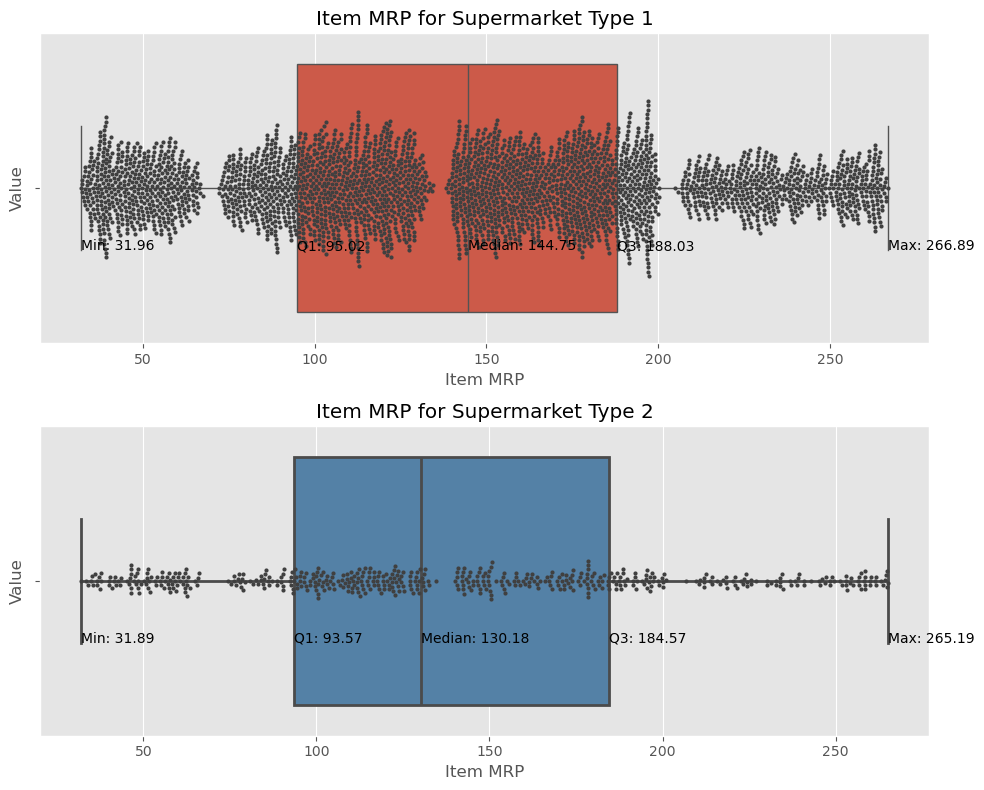

In [60]:
# Using ggplot like question states
plt.style.use('ggplot')

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Calculate five-number summary for SupType_1
min1, q1_1, median1, q3_1, max1 = SupType_1['Item_MRP'].min(), SupType_1['Item_MRP'].quantile(0.25), SupType_1['Item_MRP'].median(), SupType_1['Item_MRP'].quantile(0.75), SupType_1['Item_MRP'].max()


# Plot boxplot for SupType_1 and swarmplot for the visuals
sns.boxplot(ax=axes[0], x=SupType_1['Item_MRP'])
sns.swarmplot(ax=axes[0], x=SupType_1['Item_MRP'], color=".25", size=3)
axes[0].set_title('Item MRP for Supermarket Type 1')

# Annotate SupType_1 boxplot (Probably not necessary but looks nicer)
axes[0].annotate(f'Min: {min1:.2f}', xy=(min1, 0.1), xytext=(min1, 0.2))
axes[0].annotate(f'Q1: {q1_1:.2f}', xy=(q1_1, 0.1), xytext=(q1_1, 0.2))
axes[0].annotate(f'Median: {median1:.2f}', xy=(median1, 0.1), xytext=(median1, 0.2))
axes[0].annotate(f'Q3: {q3_1:.2f}', xy=(q3_1, 0.1), xytext=(q3_1, 0.2))
axes[0].annotate(f'Max: {max1:.2f}', xy=(max1, 0.1), xytext=(max1, 0.2))

# Calculate five-number summary for SupType_2
min2, q1_2, median2, q3_2, max2 = SupType_2['Item_MRP'].min(), SupType_2['Item_MRP'].quantile(0.25), SupType_2['Item_MRP'].median(), SupType_2['Item_MRP'].quantile(0.75), SupType_2['Item_MRP'].max()

# Plot boxplot for SupType_2 and swarmplot for the visuals
sns.boxplot(ax=axes[1], x=SupType_2['Item_MRP'], color="steelblue", linewidth=2)
sns.swarmplot(ax=axes[1], x=SupType_2['Item_MRP'], color=".25", size=3)
axes[1].set_title('Item MRP for Supermarket Type 2')

# Annotate SupType_2 boxplot
axes[1].annotate(f'Min: {min2:.2f}', xy=(min2, 0.1), xytext=(min2, 0.2))
axes[1].annotate(f'Q1: {q1_2:.2f}', xy=(q1_2, 0.1), xytext=(q1_2, 0.2))
axes[1].annotate(f'Median: {median2:.2f}', xy=(median2, 0.1), xytext=(median2, 0.2))
axes[1].annotate(f'Q3: {q3_2:.2f}', xy=(q3_2, 0.1), xytext=(q3_2, 0.2))
axes[1].annotate(f'Max: {max2:.2f}', xy=(max2, 0.1), xytext=(max2, 0.2))

# Common labels:
for ax in axes:
    ax.set_xlabel('Item MRP')
    ax.set_ylabel('Value')

# Display plots:
plt.tight_layout()
plt.show()

### Answers for question 7: 
Supermarket Type 1 has the higher median (144.75 compared to 130.18 for Supermarket Type 2)
No outliers according to the graphs. 

For Type 1: 
- IQR = Q3 - Q1 = 188.03 - 95.02 = 93.01
- Lower Bound = Q1 - 1.5 * IQR = 95.02 - 1.5*93.01 = **-44.50**
- Upper Bound = Q3 + 1.5 * IQR = 188.03 + 1.5*93.01 = **327.545**

For Type 2: 
- IQR = 184.57 - 93.57 = 91
- Lower Bound = 93.57 - 1.5*91 = **-42.93**
- Upper Bound = 184.57 + 1.5*91 = **321.07**

As you can see, the min and the maximum are well within the lower and upper bounds for Type 1 and Type 2. 



___
## 8. 
### Concatenate the DataFrames SupType_1 and SupType_2 to create a new DataFrame Grc_Concat_df and sort it in ascending order based on the column Item_Outlet_Sales. What is the Outlet_Location_type of the store with the lowest sales?

In [61]:
# We'll use pd.concat for this. 

Grc_Concat_df = pd.concat([SupType_1, SupType_2])

# Sort in ascending order based on column 'Item_Outlet_Sales'
Grc_Concat_df = Grc_Concat_df.sort_values(by='Item_Outlet_Sales', ascending=True)

# The Outlet_Location_type of the store with lowest sales:
lowest_sales_type = Grc_Concat_df.iloc[0]['Outlet_Location_Type']
nr_sales = Grc_Concat_df.iloc[0]['Item_Outlet_Sales']

print(f"Outlet_Location_Type of the store with the lowest sales is {lowest_sales_type} with {nr_sales} in sales")

Outlet_Location_Type of the store with the lowest sales is Tier 3 with 73.238 in sales


___
## 9.
### Using columns Outlet_Size and Outlet_Location_Type to create a multiple index for Grc_Concat_df. 

In [62]:
Grc_Concat_df.set_index(['Outlet_Size', 'Outlet_Location_Type'], inplace=True)

print(Grc_Concat_df.head())

                                  Item_Weight  Item_Fat_Content  \
Outlet_Size Outlet_Location_Type                                  
High        Tier 3                     20.500                 0   
Medium      Tier 3                      6.635                 1   
            Tier 3                      6.320                 0   
            Tier 2                      9.105                 0   
Small       Tier 1                     19.250                 0   

                                  Item_Visibility     Item_Type  Item_MRP  \
Outlet_Size Outlet_Location_Type                                            
High        Tier 3                       0.143164     Household   34.9190   
Medium      Tier 3                       0.046278  Frozen Foods   36.7506   
            Tier 3                       0.012770          Meat   39.9822   
            Tier 2                       0.038560     Household   33.8900   
Small       Tier 1                       0.108030     Household   32

___
## 10.
### Cut the column Item_Weight of Grc_Concat_df into 10 buckets and compute each bucket's mean, min, max and count. 

In [63]:
# We'll use pd.cut for this

# Cut the df into 10 buckets (or bins)
Grc_Concat_df['Item_Weight_Bucket'] = pd.cut(Grc_Concat_df['Item_Weight'], bins=10)

# Group the DF by the new buckets and get the required stats
bucket_stats = Grc_Concat_df.groupby('Item_Weight_Bucket')['Item_Weight'].agg(['mean', 'min', 'max', 'count'])

# Show the stats for each bucket:
print(bucket_stats)

                         mean     min     max  count
Item_Weight_Bucket                                  
(4.538, 6.234]       5.623814   4.555   6.215    253
(6.234, 7.914]       7.121807   6.235   7.905    476
(7.914, 9.594]       8.761867   7.930   9.500    450
(9.594, 11.273]     10.344917   9.600  11.150    362
(11.273, 12.952]    12.081635  11.300  12.850    419
(12.952, 14.632]    13.716193  13.000  14.600    352
(14.632, 16.312]    15.495976  14.650  16.250    410
(16.312, 17.991]    17.172672  16.350  17.850    408
(17.991, 19.671]    18.838005  18.000  19.600    396
(19.671, 21.35]     20.357012  19.700  21.350    328
